In [1]:
import numpy as np

In [2]:
from pandas import DataFrame as DFrm, read_csv

In [3]:
# ba = bytearray(1000000000)

In [4]:
from scipy.interpolate import interp1d

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [6]:
# plt.style.use('dark_background')

In [7]:
plt.style.use('darkgrid.mplstyle')

In [8]:
%matplotlib inline

In [9]:
f_bar = 1 - .87
f_dm = 1 - f_bar

In [10]:
M = read_csv('tmpdata/mass_prof.csv')

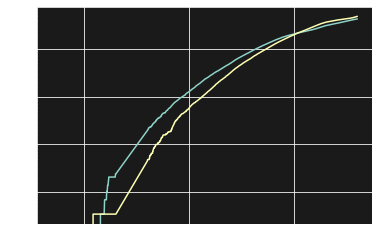

In [11]:
plt.loglog(M.r,M.Mdr)
plt.loglog(M.r,M.Mdr_dmo)

In [12]:
Ms =  M.rolling(2).mean()

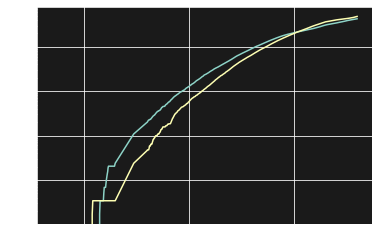

In [13]:
plt.loglog(Ms.r,Ms.Mdr)
plt.loglog(Ms.r,Ms.Mdr_dmo)

In [14]:
r, Mdr, Mdr_dmo = Ms.r.to_numpy(), Ms.Mdr.to_numpy(), Ms.Mdr_dmo.to_numpy()

In [15]:
Mhal = 3.6e14 #Mdr_dmo[-1]

In [16]:
Mgal = Mhal*f_bar/f_dm
Mgal

53793103448275.86

In [17]:
def M_IsoT_inner(r,a):
    return r - a*np.arctan(r/a)

In [18]:
def M_IsoT(r,a, size=.3):
    return np.where(r<size, M_IsoT_inner(r,a)/M_IsoT_inner(size,a), 1)

In [19]:
a=.005

In [20]:
M_IsoT(.2,a)

array(0.65794554)

In [21]:
Mbr = M_IsoT(r,a)

In [22]:
Mbr*=Mgal

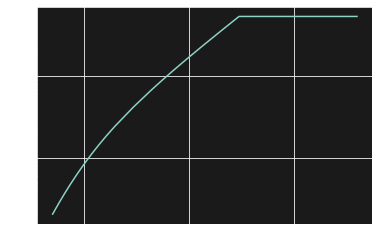

In [23]:
plt.plot(r,Mbr)
plt.xscale('log')
plt.yscale('log')

In [24]:
ri_M = interp1d(Mdr_dmo,r, )

In [25]:
# ri_M(Mdr_dmo)

In [26]:
rf = r

In [27]:
ri = ri_M(Mdr)

In [28]:
Mf = M.Mdr+Mbr

In [29]:
Mi = Mdr/f_dm

In [30]:
MiMf = ( f_dm* (Mbr/ Mdr + 1) )**-1
# MiMf

<ipython-input-30-301daa159431>:1: RuntimeWarning: divide by zero encountered in true_divide
  MiMf = ( f_dm* (Mbr/ Mdr + 1) )**-1


In [31]:
Mbr

array([5.37931034e+13, 2.04543012e+11, 2.18903997e+11, ...,
       5.37931034e+13, 5.37931034e+13, 5.37931034e+13])

Text(0.5, 0, '$M_i(r_i) ~/~ M_f(r_f)$')

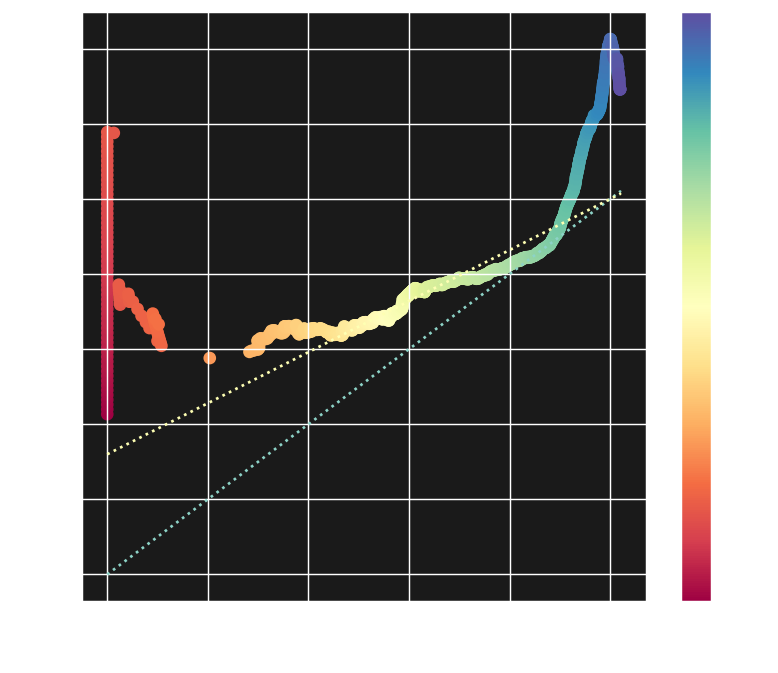

In [33]:
plt.figure(dpi=130,figsize=(7,6))
im = plt.scatter(Mi/Mf,rf/ri, c=rf, cmap='Spectral', norm=LogNorm())
plt.colorbar(im)
plt.plot(Mi/Mf,Mi/Mf,':')
plt.plot(Mi/Mf,0.68*(Mi/Mf-1)+1,':')
# plt.plot(Mi/Mf,rf)#,'o')
# plt.xlim(0,1)
# plt.ylim(top=1)
plt.ylabel('$r_f ~/~ r_i$')
plt.xlabel('$M_i(r_i) ~/~ M_f(r_f)$')

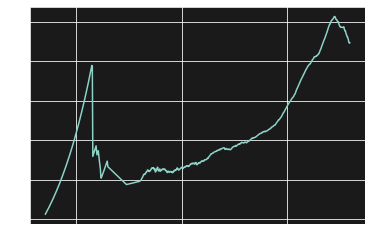

In [34]:
plt.plot(rf, rf/ri)
plt.xscale('log')

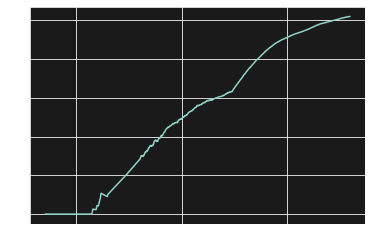

In [35]:
plt.plot(rf, Mi/Mf)
plt.xscale('log')

In [36]:
def adiab_pred(r, Mbr,Mdr_dmo):
    return Mdr

In [37]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [38]:
q = 0.68

In [39]:
xi = 1 + q * (1/ (Mbr/Mdr_dmo + f_dm) - 1)

<ipython-input-39-b58094a5f148>:1: RuntimeWarning: divide by zero encountered in true_divide
  xi = 1 + q * (1/ (Mbr/Mdr_dmo + f_dm) - 1)


In [43]:
M_r_intrp = interp1d(ri,Mdr_dmo)

In [47]:
Mdr_pred = M_r_intrp(rf/xi)

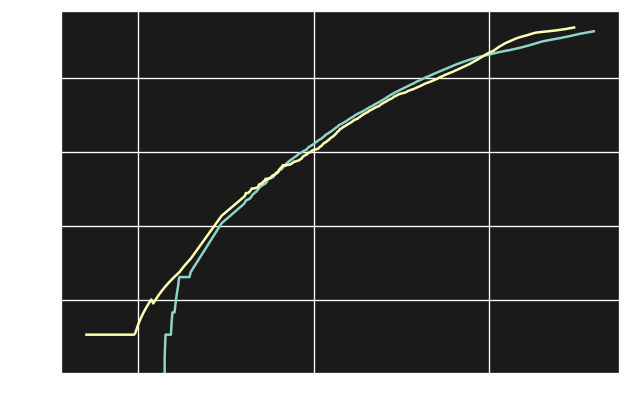

In [49]:
plt.figure(dpi=120)
plt.loglog(rf, Mdr)
plt.loglog(rf, Mdr_pred)